# Getting Started With `riweather`

In [1]:
import matplotlib.pyplot as plt

import riweather

%matplotlib inline

Suppose you need weather data at a certain site. To list all weather stations in order of their distance to that site, use [`riweather.rank_stations()`][riweather.rank_stations].

In [2]:
my_lat, my_lon = 39.98, -105.13
ranked_stations = riweather.rank_stations(my_lat, my_lon)

In [3]:
print("Number of stations returned:", ranked_stations.shape[0])
ranked_stations.head()

Number of stations returned: 2859


,name,distance,latitude,longitude,years,quality
usaf_id,,,,,,
724699,BROOMFIELD/JEFFCO,7082.790034,39.917,-105.117,"[2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...","[medium, medium, medium, medium, high, high, h..."
720534,ERIE MUNICIPAL AIRPORT,7971.794695,40.017,-105.050,"[2014, 2015, 2016, 2017, 2018, 2019, 2020, 202...","[low, high, high, high, high, high, high, high..."
720533,BOULDER MUNICIPAL AIRPORT,9477.070760,40.033,-105.217,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[medium, high, high, high, high, high, high, h..."
720538,VANCE BRAND AIRPORT,21002.247034,40.167,-105.167,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[low, high, high, high, high, high, high, high..."
725650,DENVER INTERNATIONAL AIRPORT,43134.270016,39.847,-104.656,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...","[high, high, high, high, high, high, high, hig..."


This gives us the name and USAF identifiers of all ISD weather stations in the United States, along with their latitudes and longitudes and their distances (in meters) to the target site. The "years" column is a list of years for which there is available weather data from that station. The "quality" column contains the quality of the data file for the corresponding year---this is based on the number of observations in the file.

You probably don't want all three thousand weather stations that are returned, so let's be more efficient and limit our search to stations that have data for 2022 and stations that are within 20 km.

In [4]:
ranked_stations = riweather.rank_stations(
    my_lat,
    my_lon,
    year=2022,
    max_distance_m=20000,
)
ranked_stations

,name,distance,latitude,longitude,years,quality
usaf_id,,,,,,
724699,BROOMFIELD/JEFFCO,7082.790034,39.917,-105.117,"[2006, 2007, 2008, 2009, 2010, 2011, 2012, 201...","[medium, medium, medium, medium, high, high, h..."
720534,ERIE MUNICIPAL AIRPORT,7971.794695,40.017,-105.050,"[2014, 2015, 2016, 2017, 2018, 2019, 2020, 202...","[low, high, high, high, high, high, high, high..."
720533,BOULDER MUNICIPAL AIRPORT,9477.070760,40.033,-105.217,"[2010, 2011, 2012, 2013, 2014, 2015, 2016, 201...","[medium, high, high, high, high, high, high, h..."


Select Erie Municipal Airport using [`riweather.select_station()`][riweather.select_station].

In [5]:
station = riweather.select_station(ranked_stations, rank=1)
station

Station("720534")

Let's see how complete we can expect the data to be when we pull it by looking at the quality report.

In [6]:
station.quality_report()

,usaf_id,wban_id,year,quality,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,count,n_zero_months
0,720534,00161,2014,low,0,0,0,0,0,0,2191,2172,1869,2240,2160,2174,12806,6
1,720534,00161,2015,high,2232,1981,2226,2117,2244,2035,2232,2233,2084,2217,2151,2232,25984,0
2,720534,00161,2016,high,2240,2094,2239,2168,2255,2147,2203,2129,2173,2211,2164,2150,26173,0
3,720534,00161,2017,high,2143,1961,2213,2163,2061,2167,2204,2095,2172,2198,2888,2242,26507,0
4,720534,00161,2018,high,2219,2033,2272,2198,2523,2191,2292,2388,2125,2298,2217,2284,27040,0
5,720534,00161,2019,high,2279,2084,2255,2286,2432,2288,1780,1810,2088,2226,2169,2239,25936,0
6,720534,00161,2020,high,2056,2093,2234,2167,2232,2145,2096,2026,2161,2187,2160,2202,25759,0
7,720534,00161,2021,high,2227,2027,2245,2159,2232,2174,2168,2243,2098,2235,2145,2208,26161,0
8,720534,00161,2022,high,2237,2020,2152,2049,2232,2168,2250,2241,2160,2231,2169,2187,26096,0
9,720534,00161,2023,high,2246,2005,2245,2139,2250,2183,2253,2191,2160,2242,2138,2215,26267,0


The data for 2022 is `"high"` quality, with more than 2,000 observations in each month. Assuming they are evenly spaced, that corresponds to one observation roughly every 20 minutes.

Now we can use the [`Station.fetch_temp_data()`][riweather.Station.fetch_temp_data] method to get temperature data in degrees Fahrenheit.

In [7]:
ts = station.fetch_temp_data(2022, value="temperature", scale="F")
ts.head()

2022-01-01 01:00:00+00:00    24.20913
2022-01-01 02:00:00+00:00    20.14550
2022-01-01 03:00:00+00:00    17.93000
2022-01-01 04:00:00+00:00    16.75850
2022-01-01 05:00:00+00:00    16.36475
Freq: H, Name: tempF, dtype: float64

It's important to note that **the timestamps are always in UTC**. The temperature data is hourly by default, but `riweather` can resample it to a different frequency as well.

In [8]:
ts_30min = station.fetch_temp_data(
    2022,
    value="temperature",
    scale="F",
    period="30min",
)
ts_30min.head()

2022-01-01 00:30:00+00:00    26.015
2022-01-01 01:00:00+00:00    23.246
2022-01-01 01:30:00+00:00    20.993
2022-01-01 02:00:00+00:00    19.298
2022-01-01 02:30:00+00:00    18.275
Freq: 30T, Name: tempF, dtype: float64

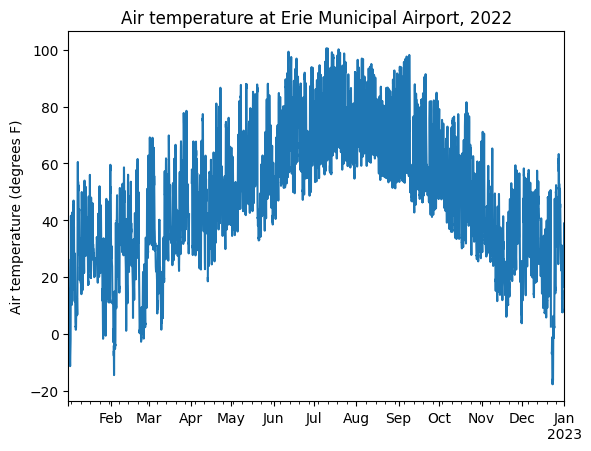

In [9]:
ts_30min.plot(
    title=f"Air temperature at {station.name.title()}, 2022",
    ylabel="Air temperature (degrees F)",
)
plt.show()

We can verify the location of our site and the nearest weather stations by plotting them on a map with [`riweather.plot_stations()`][riweather.plot_stations].

In [10]:
riweather.plot_stations(my_lat, my_lon, ranked_stations, distance_unit="mi")

Only have a ZIP code for your site and not a precise latitude and longitude? No problem. You can use [`riweather.zcta_to_lat_lon()`][riweather.zcta_to_lat_lon] to get an approximate location.

In [11]:
my_lat, my_lon = riweather.zcta_to_lat_lon("80027")
print(f"{my_lat:.3f}", f"{my_lon:.3f}")

39.951 -105.164


In [12]:
ranked_stations = riweather.rank_stations(my_lat, my_lon, max_distance_m=20000)
riweather.plot_stations(my_lat, my_lon, ranked_stations, distance_unit="mi")